In [2]:
#grouping-imputation : filling missing values
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dfo = pd.read_csv("./data/P87-S5-Grouping-Resources/train.csv", low_memory=False, parse_dates=["Date"])
dfo.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


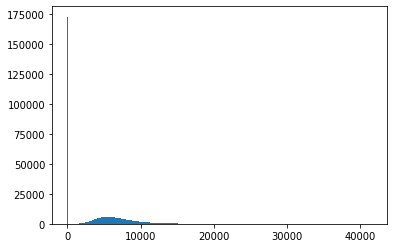

In [13]:
plt.hist(dfo.Sales, bins=1000);

(844392, 9)


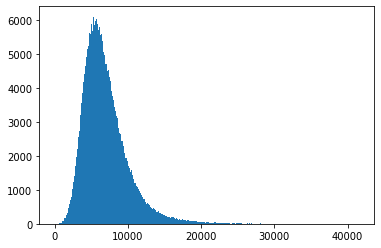

In [14]:
df = dfo[dfo.Open == 1].copy()
plt.hist(df.Sales, bins=1000);
print(df.shape);

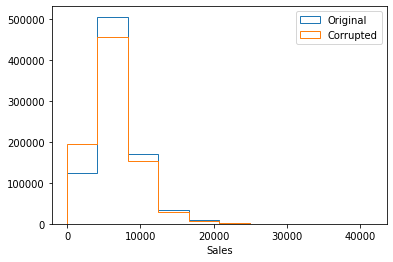

In [16]:
mask = np.random.choice(10, size=df.shape[0]) == 0
df["NewSales"] = df.Sales.copy()
df.loc[mask, "NewSales"] = np.nan

plt.hist(df.Sales, label="Original", histtype="step")
plt.hist(df.NewSales.fillna(0), label="Corrupted", histtype="step")
plt.legend()
plt.xlabel("Sales");

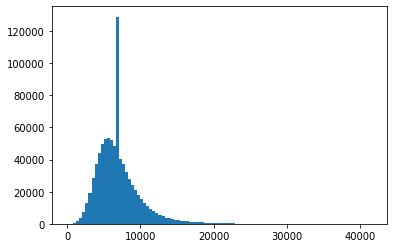

In [19]:
#transform is same as apply method
#transform returns a series of same size as input
test_fix = df.NewSales.transform(lambda x: x.fillna(x.mean()))
plt.hist(test_fix, bins = 100);

In [20]:
dfg = df.groupby(["Store", "DayOfWeek"])
dfg.median().head()

Sales  Customers  Open  Promo  SchoolHoliday  NewSales
Store DayOfWeek                                                         
1     1          5302.5      581.0   1.0    1.0            0.0    5197.0
      2          4640.5      549.5   1.0    1.0            0.0    4624.0
      3          4549.5      533.0   1.0    1.0            0.0    4561.0
      4          4380.0      525.0   1.0    1.0            0.0    4380.0
      5          4651.0      552.0   1.0    1.0            0.0    4629.0

In [ ]:
#apply transform on grouping of Store and DayOfWeek
test_fix2 = dfg.NewSales.transform(lambda x: x.fillna(x.mean()))
opts = {"histtype":"step", "bins":50}
